Using NN module
- Building the neural network using NN module
- Using buil-in activation function
- Using built-in loss function
- Using buil-in optimizer

![alt text](image.png)

![alt text](image-1.png)

- pytorch is nothing but abstraction to create neural networks 
- so that we dont have to code all the intricacies of the neural network ourself
- we just need to focus on the experimentation with different architecture

In [1]:
import torch 
import torch.nn as nn

# class should inherit from nn.Module / Base class
# with all the functionalities of nn.Module
class Model(nn.Module):
    def __init__(self, num_features):
        super().__init__() # invoke the constructor of the parent class
        
        # defining the model architecture
        self.linear1 = nn.Linear(num_features, 3)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(3, 1)
        self.sigmoid = nn.Sigmoid()
        
    # a little cumbersome; writing everything explicitly!!
    # introduction of Sequential class / container
    def forward(self, x):
        y = self.linear1(x)
        y = self.relu(y)
        y = self.linear2(y)
        y = self.sigmoid(y)
        return y

In [4]:
input_data = torch.rand(10, 5)
model = Model(input_data.shape[1])

# we observed this in Andrej Karpathy video as well 
# how to use PyTorch to declare our architecture and use it
y_pred = model(input_data) ## Magic functions __call__ and forward are called; when model object is called

In [7]:
# model.linear1.weight
model.linear1.bias

Parameter containing:
tensor([-0.3319,  0.1551,  0.4444], requires_grad=True)

In [8]:
from torchinfo import summary
summary(model, input_size=(10, 5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 3]                   18
├─ReLU: 1-2                              [10, 3]                   --
├─Linear: 1-3                            [10, 1]                   4
├─Sigmoid: 1-4                           [10, 1]                   --
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

### Using Sequential Layers | No need for manual forward pass

In [11]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, num_features):
        super().__init__()

        ## declaring the architecture of the model
        ## within the architecture we call it 
        self.network = nn.Sequential(
            nn.Linear(num_features, 3),
            nn.ReLU(),
            nn.Linear(3, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        y = self.network(x)
        return y

In [11]:
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=0.01) # declaring built-in optimizer
loss_function = nn.BCELoss() #declaring built-in loss function

epochs = 25
target = torch.tensor(1)
model = Model(input_data.shape[1])
for epoch in range(epochs):
    y_pred = model(input_data)
    loss = loss_function(y_pred, target)

    # zero the gradients before the backward pass to avoid accumulation of gradients
    # this is done for each mini-batch
    optimizer.zero_grad() # before backward pass
    loss.backward() # backpropagation
    optimizer.step() # update the weights
    
    
    

ValueError: Using a target size (torch.Size([])) that is different to the input size (torch.Size([10, 1])) is deprecated. Please ensure they have the same size.

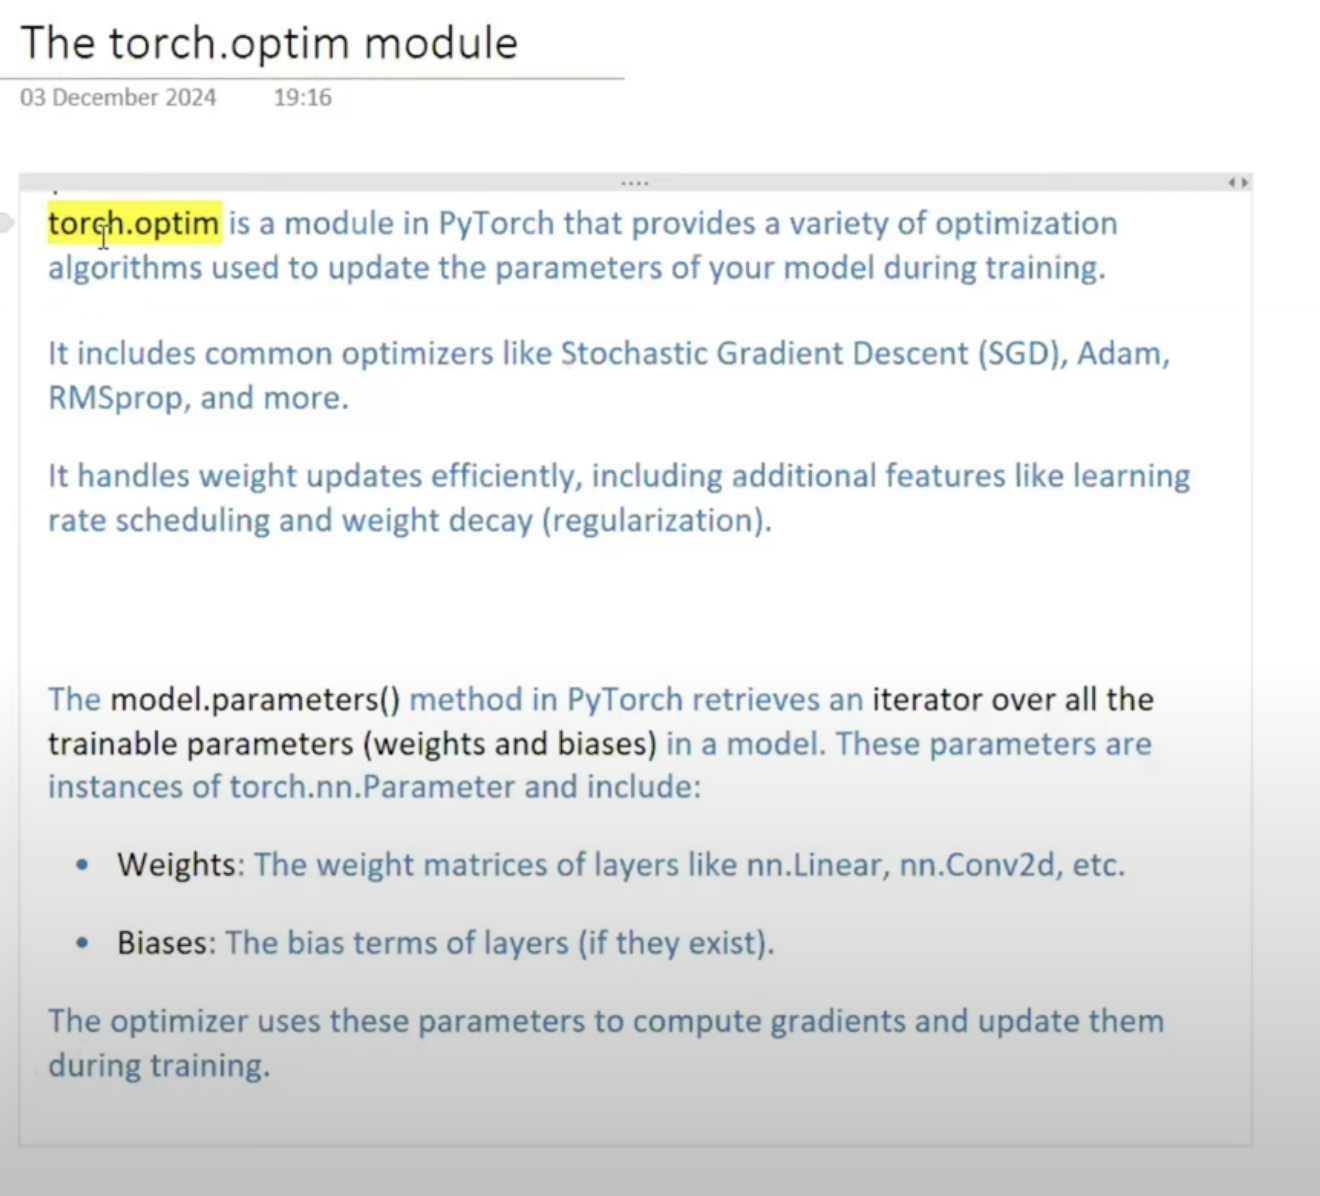